smart_hans_07312022_173453_4_131-155_08_mnn_.csv
smart_hans_07312022_171736_10_271-296_08_mnn_.csv
smart_hans_08022022_182936_5_185-215_08_wny_.csv
smart_hans_08022022_211852_10_341-371_08_mky_.csv
smart_hans_07312022_182331_4_149-180_08_wnn_.csv
smart_hans_08022022_190740_9_301-331_08_mny_.csv
smart_hans_07312022_181701_7_243-273_08_wny_.csv
smart_hans_07252022_154619_12_431-469_08_mgy_.csv
smart_hans_08022022_192941_6_217-247_08_wny_.csv
smart_hans_07312022_173105_12_400-431_08_mnn_.csv
smart_hans_07312022_175436_12_339-368_08_mny_.csv
smart_hans_08022022_192131_8_280-310_08_wny_.csv
smart_hans_07312022_161925_10_313-339_08_mny_.csv
smart_hans_08022022_191248_9_307-336_08_mny_.csv
smart_hans_08022022_192219_4_154-184_08_wny_person_hat_nach_12_gewackelt.csv
smart_hans_08022022_174636_13_433-463_08_wyn_.csv
smart_hans_07252022_154808_9_313-351_08_mny_.csv
smart_hans_07312022_170216_4_149-178_08_mgy_furz_lachen_am_ende.csv
smart_hans_08022022_195007_9_312-344_08_gny_.csv
smart_hans_0802

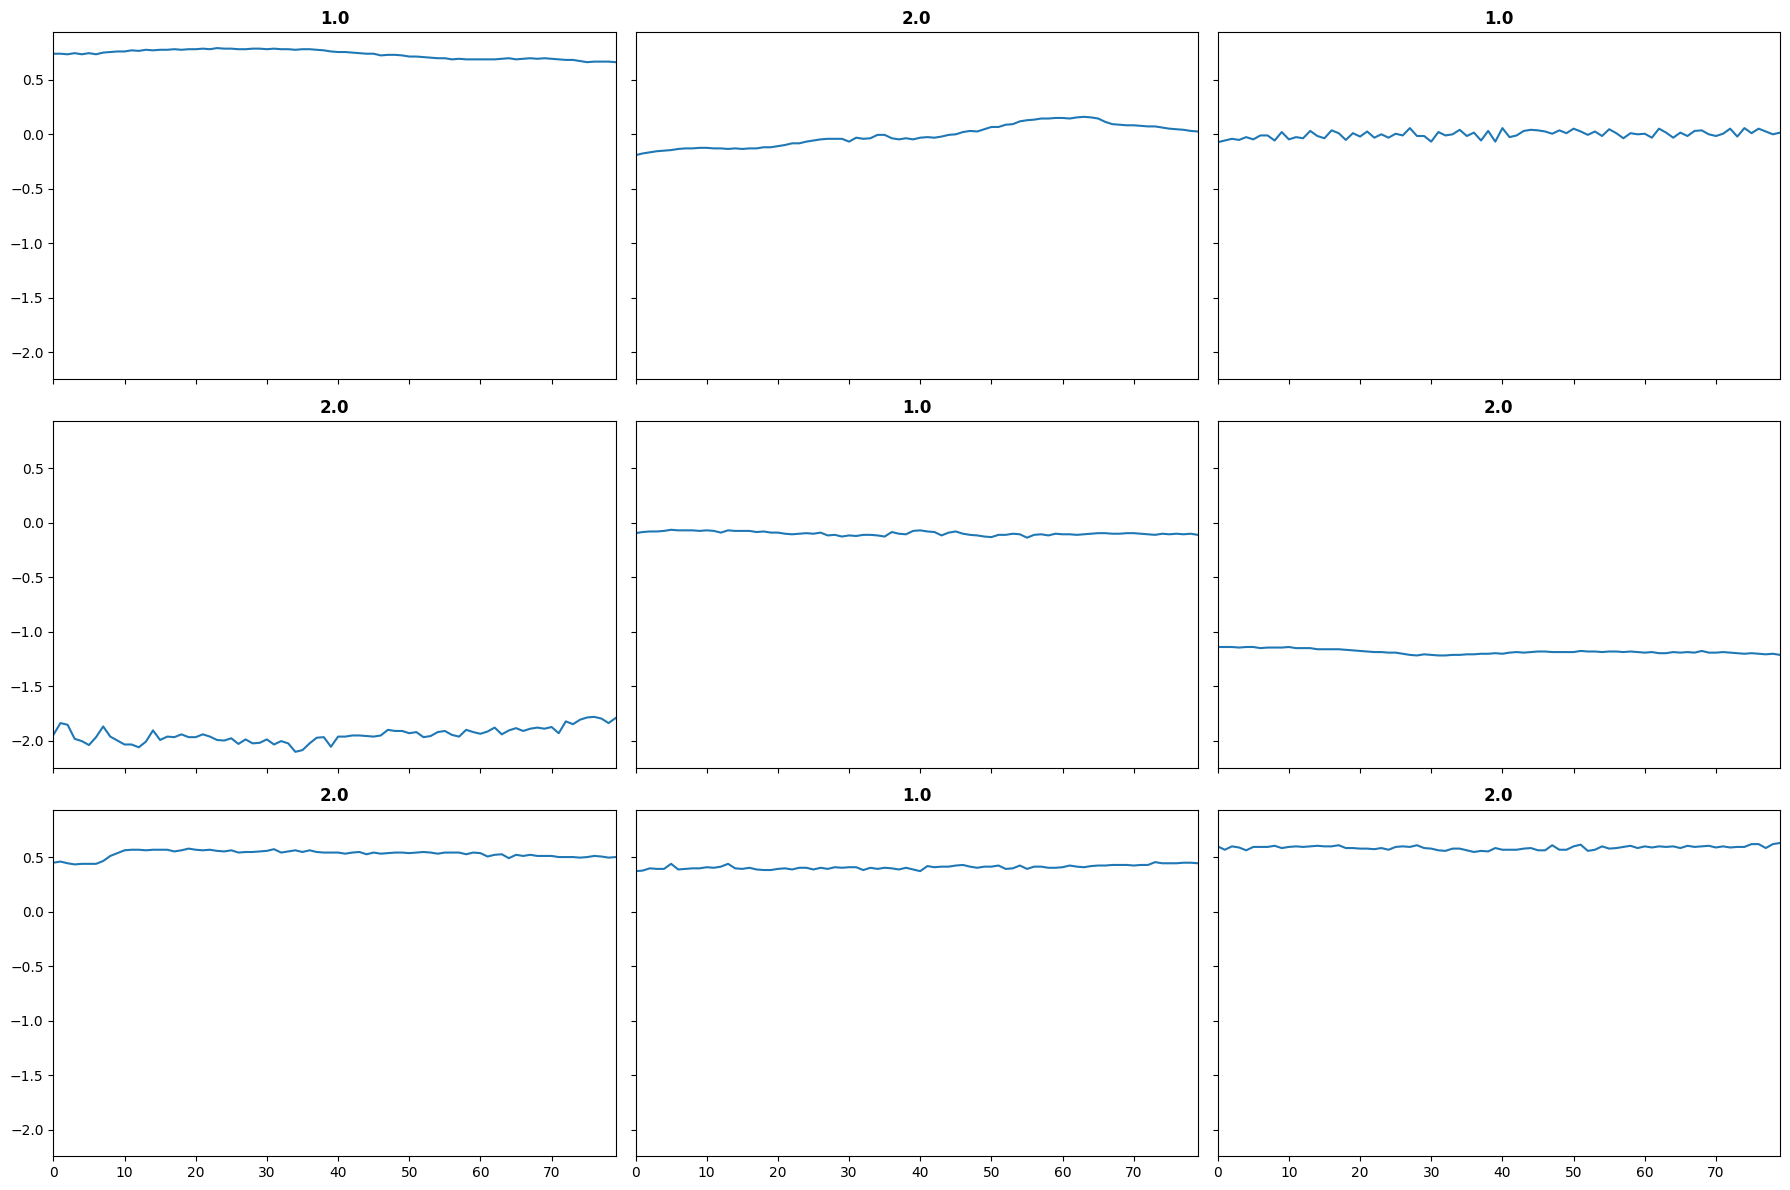

In [3]:
from turtle import shape
from tsai.all import *
import pandas as pd
from datenverarbeitung.broken_dataloader import dataloader

num_scenario = 3
nr_taps = 2
learning_cycles = 25
#features_to_learn_with = ["pitch","nosetip_y","nosetip_x","chin_x","chin_y","roll","yaw","left_eye_corner_x","left_eye_corner_y","right_eye_corner_x","right_eye_corner_y","left_mouth_corner_x","left_mouth_corner_y","right_mouth_corner_x","right_mouth_corner_y","nose_end_point_x","nose_end_point_y","head_pose1_x","head_pose1_y","head_pose2_x","head_pose2_y"]
features_to_learn_with = ["nosetip_y"]
feature_list_string = '_'.join(features_to_learn_with)
models_folder = "models"
plots_folder = "vis/plots"

dl = dataloader(scenario= num_scenario, path="/home/adi/cloudy_adlu/smart_hans/AP2/Daten/headpose_opencv_pitch_roll_yaw_20220904", nr_taps=nr_taps, move_window_by=-10, feature_list=features_to_learn_with)
df_n = dl.df


train, test= dl.train, dl.test

X_test, y_test = df2xy(test, target_col='target')
X_train, y_train = df2xy(train, target_col='target')

X, y, splits = combine_split_data([X_train, X_test], [y_train, y_test])

tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets

dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=[TSStandardize()], num_workers=0)
b = dls.one_batch()

dls.show_batch(sharey=True)


##multivariate
# cols = list(df_n.columns)
# a, b = cols.index('sample_index'), cols.index('feature')
# cols[b], cols[a] = cols[a], cols[b]
# df_n = df_n[cols]
# print(df_n)
# df_n = df_n.sort_values(['feature','target'])


In [2]:
X, old_y, names = df2xy (df_n, sample_col='sample_index', feat_col='feature', target_col='target', data_cols=None, steps_in_rows=True, return_names=True)

y = np.empty(len(old_y))
for i, elem in enumerate(old_y):
            remainder = int(elem[0]) % 10
            y[i] = remainder

#splits = get_splits(y, valid_size=.2)

tfms  = [None, TSRegression()]
dsets = TSDatasets( X,y,  inplace=True, tfms=[None, TSClassification()])

dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, num_workers=0, tfms=[None, TSClassification()], item_tfs=TSClassification())
b = dls.one_batch()

dls.show_batch(sharey=True)

KeyError: 'sample_index'

In [19]:
X.shape

(303, 1, 80)

In [6]:
model = InceptionTime(dls.vars,dls.c)
learn = Learner(dls, model)
valid_dl = dls.valid

learn.load('/home/adi/Dokumente/code/smart_hans/Machine_learning/models/scenario_3_InceptionTime_feature_nosetip_y_tapsize_40_mv_5_nr_taps_1_stage0')
#learn.save_all(path='export', dls_fname='dls', model_fname='model', learner_fname='learner')

predictor = load_learner_all(path='export', dls_fname='dls', model_fname='model', learner_fname='learner')
#learn.export("export_test.pkl")



test_probas, test_targets, test_preds = learn.get_X_preds(X[:1, :], with_decoded=True)
test_probas, test_targets, test_preds


predictor_probas, predictor_targets, predictor_preds = predictor.get_X_preds(X[:1, :], with_decoded=True)
predictor_probas, predictor_targets, predictor_preds





(TensorBase([[0.3993, 0.6007]]), None, '[2.0]')